# **Notas**
### **Alunos:**
    **Leydson Barros**    
    **Leandro Damaceno**


---



> https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1



# --**Brazilian Cities**--


1.   Classificação: Ouro
2.   Usabilidade: 10





> https://www.kaggle.com/datasets/crisparada/brazilian-cities


# --**Importações bibliotecas**-- 

In [319]:
import numpy as np
import pandas as pd
from numpy import log10
import matplotlib.pyplot as plt
%matplotlib inline

# **Base de dados** 

In [320]:

df_brazil=pd.read_csv("datas\BRAZIL_CITIES_REV2022.CSV",sep=",")
df_dictionary=pd.read_csv("datas\Data_Dictionary.csv",sep=";")

# ***Especificação***
## 1. **Coletar	dados ok**
## 2.	**Realizar pré-processamento	dos	dados**	


*   Definição	de	tipos
*   Tratamento	de	dados	ausentes
*   Normalização	e	discretização
*   Limpeza	de	dados	(univariado,	bivariado	e	
multivariado)
## 3.	**Apresentar estatísticas descritivas	dos	dados com	visualizações** 
## 4.	**Realizar teste	de	hipóteses para comparação de	valores	de	categorias	(ex.	preço	m2 em diferentes bairros)	e	visualizar diferenças**


# **Bônus:**


*   Integrar	dados	ou extrair	dados	da	Web
*   Utilizar técnicas não cobertas nas aula


# **Regiões do Brasil** 

In [321]:
# Criando os dataframes por região

nordeste = df_brazil.loc[(df_brazil['STATE'] == 'PE') | (df_brazil['STATE'] == 'MA') | (df_brazil['STATE'] == 'RN') | (df_brazil['STATE'] == 'BA') | (df_brazil['STATE'] == 'CE') | (df_brazil['STATE'] == 'AL') | (df_brazil['STATE'] == 'PI') | (df_brazil['STATE'] == 'PB') | (df_brazil['STATE'] == 'SE')]
norte =  df_brazil.loc[(df_brazil['STATE'] == 'AC') | (df_brazil['STATE'] == 'AP') | (df_brazil['STATE'] == 'AM') | (df_brazil['STATE'] == 'PA') | (df_brazil['STATE'] == 'RO') | (df_brazil['STATE'] == 'RR') | (df_brazil['STATE'] == 'TO')]
sul = df_brazil.loc[(df_brazil['STATE'] == 'PR') | (df_brazil['STATE'] == 'RS') | (df_brazil['STATE'] == 'SC')]
centroOeste =  df_brazil.loc[(df_brazil['STATE'] == 'DF') | (df_brazil['STATE'] == 'GO') | (df_brazil['STATE'] == 'MT') | (df_brazil['STATE'] == 'MS')]
sudeste = df_brazil.loc[(df_brazil['STATE'] == 'ES') | (df_brazil['STATE'] == 'MG') | (df_brazil['STATE'] == 'SP') | (df_brazil['STATE'] == 'RJ')]
# Verificação dos estados 
checknordeste = ['PE','BA', 'MA','PI','CE','RN','PB','AL','SE']
checknorte = ['AC','AP', 'AM','PA','RO','RR','TO']
checksul = ['PR','RS', 'SC']
checkcentroOeste = ['DF','GO', 'MT','MS']
checksudeste = ['ES','MG', 'SP','RJ']
# Verificação das cidades por estado
cidadesNordeste = df_brazil["STATE"].isin(checknordeste)
cidadesNorte = df_brazil["STATE"].isin(checknorte)
cidadesSul = df_brazil["STATE"].isin(checksul)
cidadesCentroOeste = df_brazil["STATE"].isin(checkcentroOeste)
cidadesSudeste = df_brazil["STATE"].isin(checksudeste)

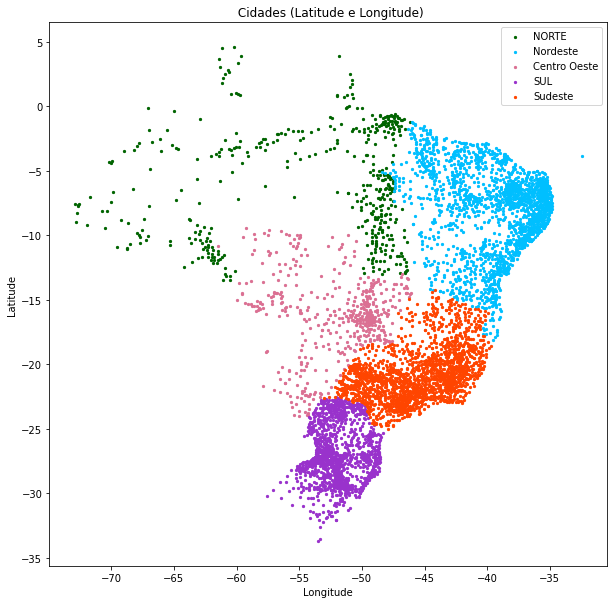

In [322]:
# Mapa do Brasil 

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 


plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(df_brazil[long&lat&cidadesNorte]["LONG"], df_brazil[long&lat&cidadesNorte]["LAT"], s=5, alpha=1, label='NORTE', c ='#006400')
plt.scatter(df_brazil[long&lat&cidadesNordeste]["LONG"], df_brazil[long&lat&cidadesNordeste]["LAT"], s=5, alpha=1, label='Nordeste', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&cidadesCentroOeste]["LONG"], df_brazil[long&lat&cidadesCentroOeste]["LAT"], s=5, alpha=1, label='Centro Oeste', c ='#DB7093')
plt.scatter(df_brazil[long&lat&cidadesSul]["LONG"], df_brazil[long&lat&cidadesSul]["LAT"], s=5, alpha=1, label='SUL', c ='#9932CC')
plt.scatter(df_brazil[long&lat&cidadesSudeste]["LONG"], df_brazil[long&lat&cidadesSudeste]["LAT"], s=5, alpha=1, label='Sudeste', c ='#FF4500')

plt.legend()
plt.show()

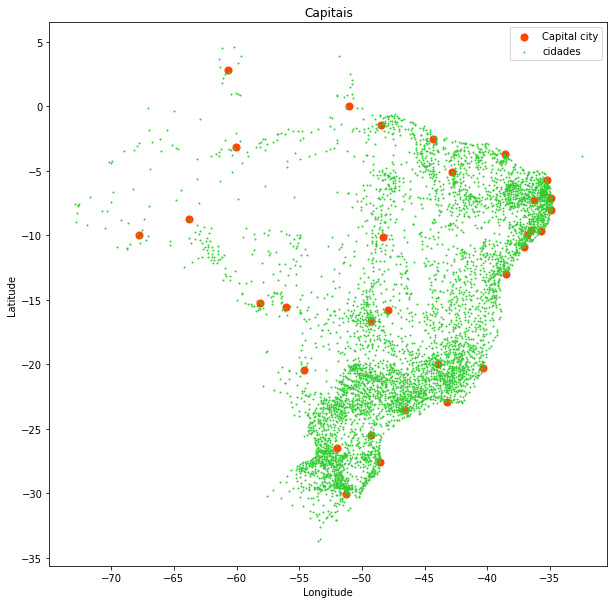

In [323]:
# Mapa do Brasil Capitais

long= df_brazil["LONG"] != 0
lat = df_brazil["LAT"] !=0 
cap = df_brazil['CAPITAL'] ==1
 
## use the scatter function
plt.figure(figsize=(10,10))
plt.title("Capitais")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cap]["LONG"], df_brazil[long&lat&cap]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.scatter(df_brazil[long&lat&~cap]["LONG"], df_brazil[long&lat&~cap]["LAT"], s=1, alpha=1, label='cidades', c = '#32cd32')
plt.legend()
plt.show()

In [324]:
#Analisando os tipos de dados que existe no meu dataframe
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5578 non-null   object 
 1   STATE                   5578 non-null   object 
 2   CAPITAL                 5578 non-null   int64  
 3   IBGE_RES_POP            5578 non-null   int64  
 4   IBGE_RES_POP_BRAS       5578 non-null   int64  
 5   IBGE_RES_POP_ESTR       5578 non-null   int64  
 6   IBGE_DU                 5578 non-null   int64  
 7   IBGE_DU_URBAN           5578 non-null   int64  
 8   IBGE_DU_RURAL           5578 non-null   int64  
 9   IBGE_POP                5578 non-null   int64  
 10  IBGE_1                  5578 non-null   int64  
 11  IBGE_1-4                5578 non-null   int64  
 12  IBGE_5-9                5578 non-null   int64  
 13  IBGE_10-14              5578 non-null   int64  
 14  IBGE_15-59              5578 non-null   

<AxesSubplot:>

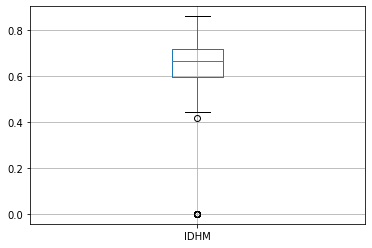

In [285]:
df_brazil.boxplot(column=['IDHM'])

In [286]:
df_brazil.loc[(df_brazil['IDHM'] < 0.5)][['CITY','STATE','IDHM']]

,CITY,STATE,IDHM
37,Afuá,PA,0.489
149,Amajari,RR,0.484
179,Anajás,PA,0.484
378,Assunção Do Piauí,PI,0.499
383,Atalaia Do Norte,AM,0.450
419,Bagre,PA,0.471
436,Balneário Rincão,SC,0.000
586,Betânia Do Piauí,PI,0.489
809,Cachoeira Do Piriá,PA,0.473
1159,Caxingó,PI,0.488


In [287]:
df_brazil.loc[(df_brazil['IDHM'] ==  1) | (df_brazil['IDHM'] > 0.6)][['CITY','STATE','IDHM']]

,CITY,STATE,IDHM
0,Abadia De Goiás,GO,0.708
1,Abadia Dos Dourados,MG,0.689
2,Abadiânia,GO,0.689
3,Abaetetuba,PA,0.628
4,Abaeté,MG,0.698
...,...,...,...
5571,Álvares Machado,SP,0.758
5572,Álvaro De Carvalho,SP,0.688
5573,Áurea,RS,0.707
5574,Ângulo,PR,0.721


# **Analisando as Regiões** 

### **Nordeste**

In [383]:

DadosNordeste = [{'Capitais':nordeste.loc[(nordeste['CAPITAL'] == 1)]['CITY'].count(),'Cidades': nordeste['CITY'].count(),'Habitantes': nordeste['IBGE_RES_POP'].sum(), 'Empresas': nordeste['COMP_TOT'].sum()  }]
df_DadosNordeste = pd.DataFrame(DadosNordeste)
df_DadosNordeste


,Capitais,Cidades,Habitantes,Empresas
0,13,1797,53081950,771419


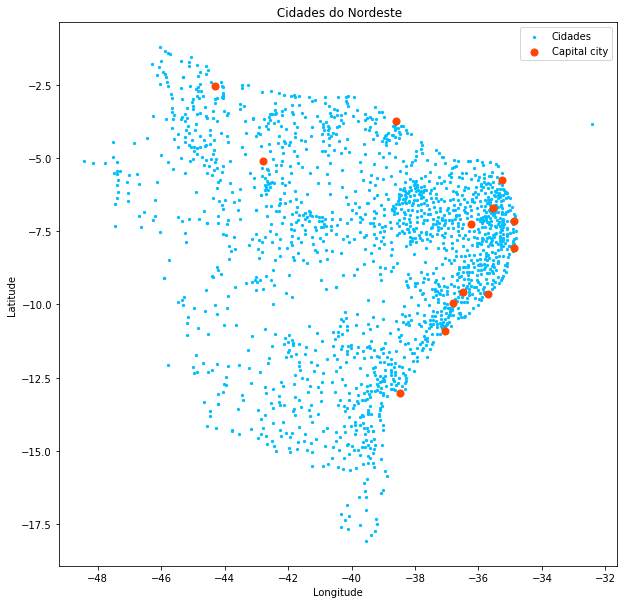

In [341]:
# Mapa do Nordeste

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
capNordeste = nordeste['CAPITAL'] ==1
## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades do Nordeste")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesNordeste]["LONG"], df_brazil[long&lat&cidadesNordeste]["LAT"], s=5, alpha=1, label='Cidades', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&capNordeste]["LONG"], df_brazil[long&lat&capNordeste]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.legend()
plt.show()

<AxesSubplot:>

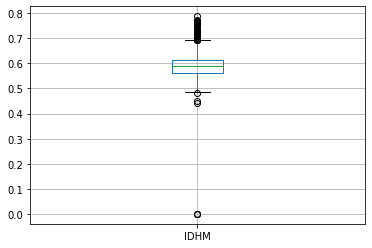

In [290]:
#Analisando o IDHM das cidades do Nordeste
nordeste.boxplot(column=['IDHM'])

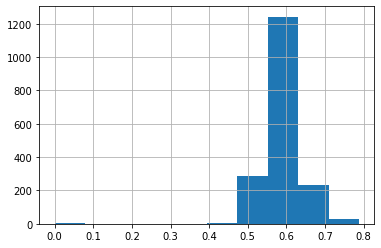

In [353]:
#Histograma do IDHM
histPE=nordeste['IDHM'].hist()

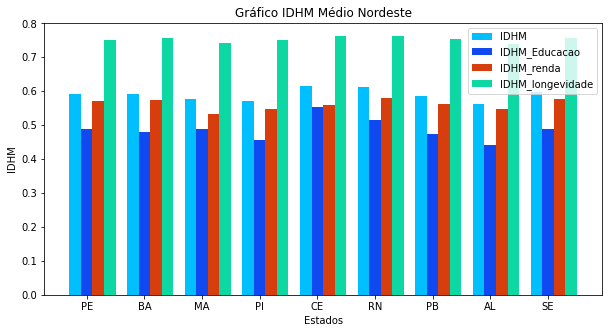

In [366]:
#Comparando os IDHM dos estados do Nordeste
# Criando lista
dados1 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM_Educacao.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM_Educacao.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM_Educacao.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM_Educacao.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM_Educacao.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM_Educacao.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM_Educacao.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM_Educacao.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM_Educacao.mean()}
dados2 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM.mean()}
dados3 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM_Renda.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM_Renda.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM_Renda.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM_Renda.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM_Renda.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM_Renda.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM_Renda.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM_Renda.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM_Renda.mean()}
dados4 =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM_Longevidade.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM_Longevidade.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM_Longevidade.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM_Longevidade.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM_Longevidade.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM_Longevidade.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM_Longevidade.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM_Longevidade.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM_Longevidade.mean()}
Estados = list(dados1.keys())

MediaIDHM = list(dados2.values())
MediaIDHM_Educacao = list(dados1.values())
MediaIDHM_renda = list(dados3.values())
MediaIDHM_longevidade = list(dados4.values())

barWidth = 0.2

r1 = np.arange(len(MediaIDHM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig = plt.figure(figsize = (10, 5))

#Criando as barras
plt.bar(r1,MediaIDHM, color = '#00BFFF', width = barWidth, label = 'IDHM')
plt.bar(r2,MediaIDHM_Educacao, color = '#1049F0', width = barWidth, label = 'IDHM_Educacao')
plt.bar(r3,MediaIDHM_renda, color = '#D73E0D', width = barWidth, label = 'IDHM_renda')
plt.bar(r4,MediaIDHM_longevidade, color = '#0DD7A3', width = barWidth, label = 'IDHM_longevidade')


# criando Gráfico
plt.xlabel("Estados")
plt.xticks([r + barWidth for r in range(len(MediaIDHM))], Estados)
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio Nordeste")
plt.legend()
plt.show()


In [401]:
#As 50 cidades Melhores cidades turisticas do Nordeste 
nordeste.loc[(nordeste['IDHM'] >= 0.650) & (nordeste['REGIAO_TUR'] != '0')][['CITY','STATE','IDHM','REGIAO_TUR','CATEGORIA_TUR', 'RURAL_URBAN']].sort_values('IDHM', ascending=False).head(50)

,CITY,STATE,IDHM,REGIAO_TUR,CATEGORIA_TUR,RURAL_URBAN
1735,Fernando De Noronha,PE,0.788,História E Mar,B,Rural Remoto
4078,Recife,PE,0.772,História E Mar,A,Urbano
256,Aracaju,SE,0.770,Polo Costa Dos Coqueirais,A,Urbano
4959,São Luís,MA,0.768,Polo São Luís,A,Urbano
3586,Parnamirim,RN,0.766,Polo Costa Das Dunas,C,Urbano
2580,João Pessoa,PB,0.763,Costa Das Piscinas,A,Urbano
3206,Natal,RN,0.763,Polo Costa Das Dunas,A,Urbano
4300,Salvador,BA,0.759,Baía De Todos Os Santos,A,Urbano
1793,Fortaleza,CE,0.754,Fortaleza,A,Urbano
2717,Lauro De Freitas,BA,0.754,Costa Dos Coqueiros,C,Urbano


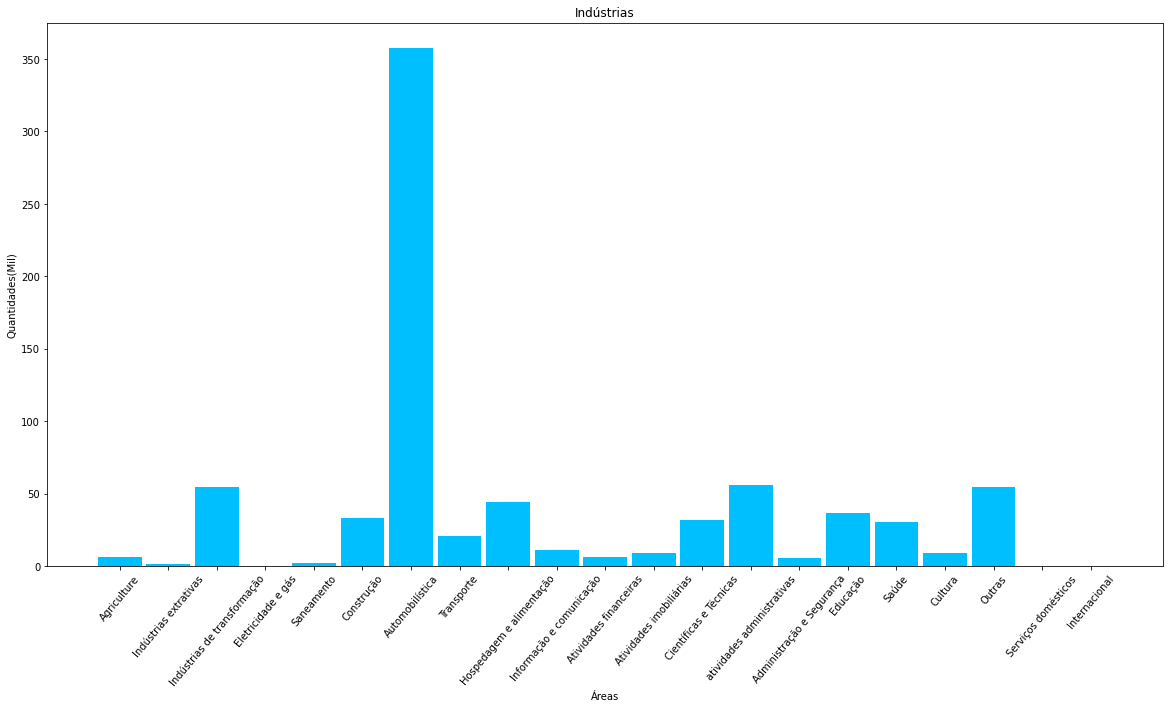

In [384]:
# Criando Principais tipos de Industria no Nordeste
dados =  {'Agriculture':nordeste.COMP_A.sum()/1000,'Indústrias extrativas':nordeste.COMP_B.sum()/1000,'Indústrias de transformação':nordeste.COMP_C.sum()/1000,'Eletricidade e gás':nordeste.COMP_D.sum()/1000,'Saneamento':nordeste.COMP_E.sum()/1000,'Construção':nordeste.COMP_F.sum()/1000,'Automobilística':nordeste.COMP_G.sum()/1000,'Transporte':nordeste.COMP_H.sum()/1000,'Hospedagem e alimentação':nordeste.COMP_I.sum()/1000,'Informação e comunicação':nordeste.COMP_J.sum()/1000,'Atividades financeiras':nordeste.COMP_K.sum()/1000,'Atividades imobiliárias':nordeste.COMP_L.sum()/1000,'Científicas e Técnicas':nordeste.COMP_M.sum()/1000,'atividades administrativas':nordeste.COMP_N.sum()/1000,'Administração e Segurança':nordeste.COMP_O.sum()/1000,'Educação':nordeste.COMP_P.sum()/1000,'Saúde':nordeste.COMP_Q.sum()/1000,'Cultura':nordeste.COMP_R.sum()/1000,'Outras':nordeste.COMP_S.sum()/1000,'Serviços domésticos':nordeste.COMP_T.sum()/1000,'Internacional':nordeste.COMP_U.sum()/1000}
Industria = list(dados.keys())
qtd = list(dados.values())
fig = plt.figure(figsize = (20, 10))

# criando Gráfico
plt.bar(Industria, qtd, color ='#00BFFF',width = 0.9)
plt.xticks(rotation = 50)
plt.xlabel("Áreas")
plt.ylabel("Quantidades(Mil)")
plt.title("Indústrias")
plt.show()

# **----------------------------------------------------------------------------** 

# **Leandro aqui**

In [301]:
df_brazil.describe()

,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
count,5578.000000,5.578000e+03,5.578000e+03,5578.000000,5.578000e+03,5.578000e+03,5578.000000,5.578000e+03,5578.000000,5578.000000,...,5578.000000,5.578000e+03,5.578000e+03,5.578000e+03,5.578000e+03,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000
mean,0.005916,3.422313e+04,3.414573e+04,77.404625,1.028313e+04,8.842319e+03,1440.807458,2.755270e+04,382.669236,1542.089100,...,0.947293,5.500436e+09,3.598663e+09,9.839788e+03,4.869557e+03,5.739871,0.022409,0.127465,0.037827,2.035497
std,0.076695,2.028829e+05,2.012627e+05,1793.789719,6.469199e+04,6.428575e+04,1690.483808,1.857468e+05,2324.175869,9242.622881,...,1.069279,2.775752e+11,1.164327e+11,9.175728e+04,2.091673e+04,55.301718,0.148024,2.151446,0.533446,4.378558
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.217000e+03,5.214000e+03,0.000000,1.565250e+03,8.700000e+02,469.250000,2.784250e+03,38.000000,158.000000,...,0.000000,0.000000e+00,0.000000e+00,5.990000e+02,5.880000e+02,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.092650e+04,1.091600e+04,0.000000,3.167000e+03,1.839500e+03,916.000000,6.156000e+03,92.000000,376.000000,...,1.000000,0.000000e+00,2.319925e+07,1.431500e+03,1.280000e+03,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,2.340900e+04,2.338000e+04,10.000000,6.722500e+03,4.618750e+03,1811.750000,1.529875e+04,232.000000,949.750000,...,2.000000,4.774853e+07,1.991191e+08,4.084000e+03,3.292750e+03,1.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.125350e+07,1.113378e+07,119727.000000,3.576148e+06,3.548433e+06,33809.000000,1.046364e+07,129464.000000,514794.000000,...,8.000000,1.947077e+13,8.016164e+12,5.740995e+06,1.134570e+06,3236.000000,1.000000,130.000000,26.000000,225.000000


In [302]:
#  Eliminando linhas duplicadas, Cidades: Assis, Paraty e Nova Fátima
df_brazil = df_brazil.drop_duplicates()

In [303]:
# Cidade de Paraty possui dois dados sobre a agência de correios, eliminei o diferente de 1 (pesquisado no google que só existe uma agência)
df_brazil.drop(df_brazil.loc[(df_brazil['CITY']=='Paraty') & (df_brazil['POST_OFFICES'] != 1)].index, inplace=True)

<AxesSubplot:xlabel='RURAL_URBAN'>

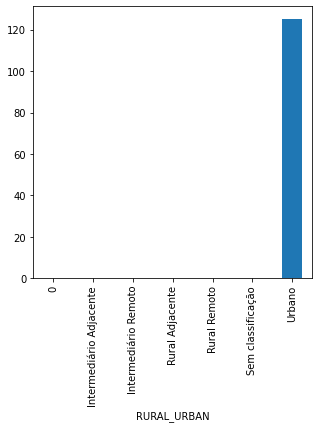

In [304]:
# gráfico mostrando que só há uber na área urbana
df_brazil.groupby('RURAL_URBAN')['UBER'].sum().plot(kind='bar',figsize=(5,5))

<AxesSubplot:ylabel='None'>

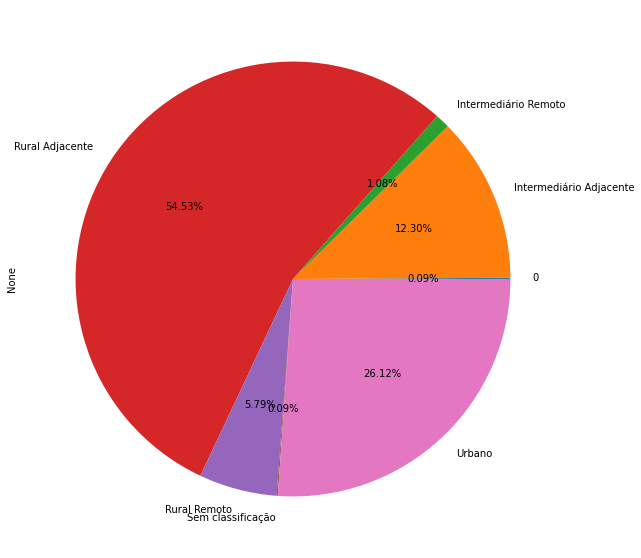

In [305]:
#Porcentagem correpondente de cada tipologia

df_brazil.groupby(['RURAL_URBAN']).size().plot(kind='pie', autopct='%0.2f%%', figsize=(10,10))

In [306]:
# De acordo com o IBGE a menor cidade do Brasil tem 3565 km², dando o código abaixo , retona 3 cidades com área 0
df_brazil[(df_brazil['AREA'] < 3.565)]
df_brazil.drop(df_brazil.loc[(df_brazil['AREA'] <  3565)].index, inplace=True)

In [307]:
# De acordo com o IBGE a  cidade do Brasil menos povoada tem 776 pessoas
df_brazil[(df_brazil['IBGE_RES_POP'] < 776)]
df_brazil.drop(df_brazil.loc[(df_brazil['IBGE_RES_POP']< 3.565)].index, inplace=True)

In [308]:
df_brazil['Cars'].value_counts()

13       4
7        3
4        3
5        3
17       3
        ..
19757    1
296      1
294      1
11556    1
1020     1
Name: Cars, Length: 395, dtype: int64

In [309]:
df_brazil['Cars'].describe()

count    4.260000e+02
mean     1.140961e+04
std      6.882321e+04
min      2.000000e+00
25%      2.900000e+02
50%      1.155000e+03
75%      3.915750e+03
max      1.288107e+06
Name: Cars, dtype: float64

<AxesSubplot:>

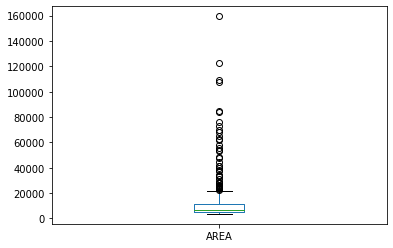

In [310]:
df_brazil['AREA'].plot.box()

<AxesSubplot:>

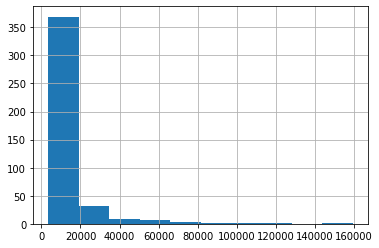

In [311]:
df_brazil['AREA'].hist()

<AxesSubplot:>

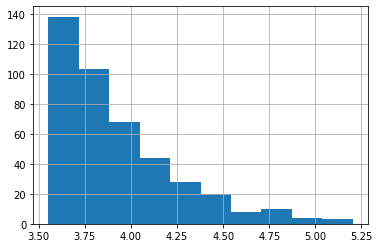

In [312]:
 # Como visto em cima , os dados não estão simétricos , então aplicamos log10
 df_brazil['AREA_Log'] = log10(df_brazil['AREA'], where=df_brazil['AREA'] > 0)
 df_brazil['AREA_Log'].hist()

In [313]:
# Usando z-core robusto
from numpy import abs
mad = abs(df_brazil['AREA_Log'] - df_brazil['AREA_Log'].median()).median()*(1/0.6745)
print(mad)

0.27859492311959777


<AxesSubplot:>

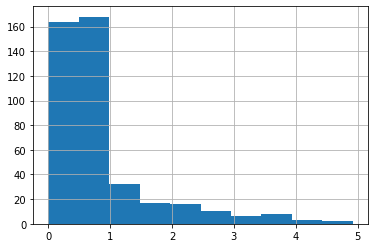

In [314]:
# Agora vamos plotar o z-score robusto
(abs(df_brazil['AREA_Log']-df_brazil['AREA_Log'].median())/mad).hist()

In [315]:
# Usando a limiar > 3.5, encontro os outliers
df_brazil[abs(df_brazil['AREA_Log']-df_brazil['AREA_Log'].median())/mad > 3.5]

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES,AREA_Log
88,Almeirim,PA,0,33614,33606,8,7729,4813,2916,19899,...,75167787,132714271,1098,1838,5,0,0,0,2,4.863054
100,Altamira,PA,0,99075,99023,52,25619,22677,2942,79622,...,471557677,2225758383,11102,41071,1,0,0,0,3,5.202851
383,Atalaia Do Norte,AM,0,15153,15033,120,1771,1256,515,6838,...,0,0,18,401,0,0,0,0,1,4.883293
459,Barcelos,AM,0,25718,25715,3,3971,2354,1617,10901,...,18919464,8272202,106,806,0,0,0,0,1,5.087998
1377,Corumbá,MS,0,103703,102967,736,27697,24831,2866,91373,...,270000497,1515715059,19757,13125,13,0,0,0,2,4.811050
2625,Jutaí,AM,0,17992,17939,53,2798,1939,859,10524,...,18776192,0,8,539,0,0,0,0,1,4.841719
2793,Lábrea,AM,0,37701,37679,22,7486,5295,2191,23391,...,40874982,58693763,143,1726,0,0,0,0,1,4.834183
3426,Oriximiná,PA,0,62794,62759,35,13187,8821,4366,40079,...,37253955,247442823,1894,6847,0,0,0,0,2,5.031826
4801,São Félix Do Xingu,PA,0,91340,91328,12,21218,11356,9862,44825,...,106647035,362640379,1287,14328,0,0,0,0,1,4.925379
4804,São Gabriel Da Cachoeira,AM,0,37896,37821,75,4216,3953,264,18872,...,49475153,52738484,1362,1672,0,0,0,0,3,5.038148


In [316]:
# Gerando novo dataframe, eliminando os outros
df_brazil = df_brazil[abs(df_brazil['AREA_Log']-df_brazil['AREA_Log'].median())/mad < 3.5]